# **Wprowadzenie do analizy danych przy pomocy pakietu Pandas**

W tym zadaniu spróbujesz wykorzystać pakiet Pythona o nazwie Pandas do odczytu i analizy prostego zbioru danych.

Materiały pomocnicze możesz znaleźć np. na stronie: https://intertechacademy.pl/2020/08/machine-learning-w-pythonie-szybki-start/

**Uwaga! Niektóre komórki z kodem zawierają przykładowe wyniki jakie powinno udać Ci się uzyskać. Wyniki te zostaną utracone gdy uruchomisz kod z komórki.**

## **Import modułów Pythona**
Oprócz modułów numpy i pyplot, z których korzystaliśmy w poprzednim ćwiczeniu tym razem poznasz dwa nowe moduły. Pierwszy z nich to właśnie pandas, który ułatwia pracę na zbiorach danych w postaci tabelarycznej, a drugi to sklearn.datasets z pakietu Scikit-Learn. Moduł ten zawiera kilka wbudowanych zbiorów danych, z których będziemy korzystać.

In [ ]:
import pandas as pd
import sklearn.datasets

import numpy as np
import matplotlib.pyplot as plt

## **Wczytanie danych**
Za pomocą modułu sklearn.datasets odczytaj zbiór danych California Housing. Następnie przetwórz to obiektu klasy DataFrame z pakietu Pandas. Służy do tego poniższy kod:


In [ ]:
dataset = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame.from_dict(data = dict(zip(dataset['feature_names'], dataset['data'].T)))
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## **Zadanie 1**
Zbiór California Housing zawiera dane o nieruchomościach w różnych lokalizacjach w Kalifornii. Napisz program, który na podstawie tych danych obliczy i wyświetli wartość średnią oraz odchylenie standardowe mediany dochodów (kolumna MedInc) w każdej z tych lokalizacji.

In [ ]:
#Konwersja do ndarray
data = df.to_numpy()

#Funkcja licząca średnią
def Average(lst):
  return sum(lst) / len(lst)

#Tworzenie listy zawierającej mediany
medlist = [data[0,0], data[1,0],data[2,0],data[3,0],data[4,0]]

#Wyswietlenie sredniej
avg = Average(medlist)
print('Średnia wartości mediany dochodów = ', avg)

#wyswietlenie odchylenia
stdev = np.std(medlist)
print('Odchylenie standardowe mediany dochodów = ', stdev)


#Średnia wartości mediany dochodów=3.8706710029070246
#Odchylenie standardowe mediany dochodów=1.8998217179452732

Średnia wartości mediany dochodów =  6.67466
Odchylenie standardowe mediany dochodów =  1.718979536352891


## **Zadanie 2**
Dodaj do obiektu df kolumnę z cenami mieszkań.

In [ ]:
df['Price'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## **Zadanie 3**
Narysuj mapę, która za pomocą kolorów pokaże ceny mieszkań w konkretnych lokalizacjach. Na osi poziomej umieść długość geograficzną (Longitude), a na pionowej szerokość geograficzną (Latitude).

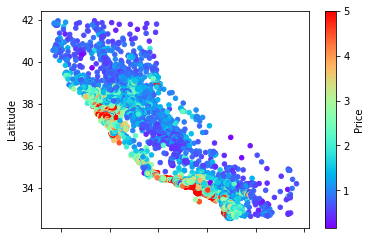

In [ ]:
df.plot.scatter(x="Longitude", y="Latitude", c='Price',colormap = 'rainbow')

## **Zadanie 4**
Oblicz macierz korelacji pomiędzy wszystkimi kolumnami z tabeli df wyłączywszy kolumny Latitude i Longitude. Następnie wybierz dwie najsilniej skorelowane kolumny (wartość bezwzględna ze współczynnika korelacji powinna być jak najbliższa jedynce) i wygeneruj wykres punktowy, w którym wartości z jednej kolumny znajdą się na osi X, a z drugiej na osi Y. 

**Uwaga! Przykładowy wynik pokazuje niewłaściwe wybrane kolumny. Samodzielnie wybierz najsilniej skorelowane zmienne.**

Macierz korelacji:
              MedInc  HouseAge  AveRooms  Population  AveOccup     Price
MedInc      1.000000 -0.119034  0.326895    0.004834  0.018766  0.688075
HouseAge   -0.119034  1.000000 -0.153277   -0.296244  0.013191  0.105623
AveRooms    0.326895 -0.153277  1.000000   -0.072213 -0.004852  0.151948
Population  0.004834 -0.296244 -0.072213    1.000000  0.069863 -0.024650
AveOccup    0.018766  0.013191 -0.004852    0.069863  1.000000 -0.023737
Price       0.688075  0.105623  0.151948   -0.024650 -0.023737  1.000000
AxesSubplot(0.125,0.125;0.775x0.755)


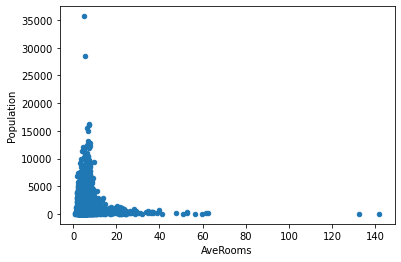

In [ ]:
#Usunięcie zbędnych kolumn
#df.drop('Longitude', axis=1, inplace=True)
#df.drop('Latitude', axis=1, inplace=True)
#df.drop('AveBedrms', axis=1,inplace=True)

#Wyświetlenie macierzy korelacji:
print('Macierz korelacji:')
print(df.corr(method ='pearson')) 

#Wyświetlenie wykresu punktowego
print(df.plot.scatter('AveRooms','Population'))